# Bank Churn

Datos tomados de Kaggle.

https://www.kaggle.com/sakshigoyal7/credit-card-customers

https://www.kaggle.com/thomaskonstantin/bank-churn-data-exploration-and-churn-prediction

### Atributos

* **CLIENTNUM** - Client number. Unique identifier for the customer holding the account

* **Attrition_Flag** - Internal event (customer activity) variable - if the account is closed then 1 else 0

* **Customer_Age** - Demographic variable - Customer's Age in Years

* **Gender** - Demographic variable - M=Male, F=Female

* **Dependent_count** - Demographic variable - Number of dependents

* **Education_Level** - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.) 

* **Marital_Status** - Demographic variable - Married, Single, Divorced, Unknown

* **Income_Category** - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)

* **Card_Category** - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

* **Months_on_book** - Period of relationship with bank

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
df = pd.read_csv('BankChurners.csv', sep = ',')
print(df.shape)
df.head(3)

(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


In [4]:
print('Tenemos {} clientes con un total de {} características'.format(df.shape[0], df.shape[1]))

Tenemos 10127 clientes con un total de 23 características


Según la documentación de Kaggle, debemos eliminar las últimas dos columnas. Validamos sus nombres:

In [5]:
df.columns[-2:,]

Index(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], dtype='object')

Eliminamos las 2 últimas columnas. Tambien el ID.

In [6]:
#df = df.drop([df.columns[-1,], df.columns[-2,]], axis = 1)
df = df[df.columns[1:-2]]
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


---

## EDA (Exploratory Data Analysis) - Entendimiento y preparación de los datos

### Analizamos la variable objetivo

In [7]:
df.Attrition_Flag.describe(include='all')

count                 10127
unique                    2
top       Existing Customer
freq                   8500
Name: Attrition_Flag, dtype: object

Tenemos 2 categorías disponibles correspondientes a los clientes que aún están y los que se fueron (Existing Customer and Attrited Curtomer). La categoría más frecuente es Existing Customer. 

#### Proporción de cada categoría

83.934037720944


col_0,count
Attrition_Flag,
Attrited Customer,1627
Existing Customer,8500


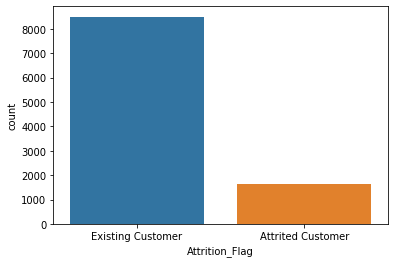

In [27]:
print((df.Attrition_Flag.describe(include='all')['freq']/df.Attrition_Flag.describe(include='all')['count']) * 100)

sns.countplot(data = df, x = 'Attrition_Flag')
pd.crosstab(index=df["Attrition_Flag"], columns="count")

Notamos que una categoría Existing Customer corresponde al 84% de los datos. Claramente estamos ante un desequilibrio.

Usamos la función describe para resumir cada atributo y buscar valores faltantes, entre otros..

#### Analizamos los tipos de datos y la cantidad disponibles de cada uno según la característica.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int64
Total_Trans_Ct              10127 non-null int

No se encuentran anomalías en los tipos de datos ni tampoco en la cantidad disponibles (NAs). 

Separamos variables numéricas y categóricas para facilitar el análisis gráfico (graficar mediante un bucle). La variable target la dejamos por fuera.

In [34]:
var_numericas = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 
                 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 
                 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
var_categoricas = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

In [30]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127,NaN,NaN,NaN,46.326,8.01681,26,41,46,52,73
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127,NaN,NaN,NaN,2.3462,1.29891,0,1,2,3,5
Education_Level,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127,NaN,NaN,NaN,35.9284,7.98642,13,31,36,40,56
Total_Relationship_Count,10127,NaN,NaN,NaN,3.81258,1.55441,1,3,4,5,6


### Visualizaciones de las variables independientes.

In [31]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
independientes = df.columns[1:]
dependiente = df.columns[0]

In [ ]:
df.iloc[:,'Gender']

### Visualizaciones de las las variables independientes vs objetivo.

### Variables categóricas

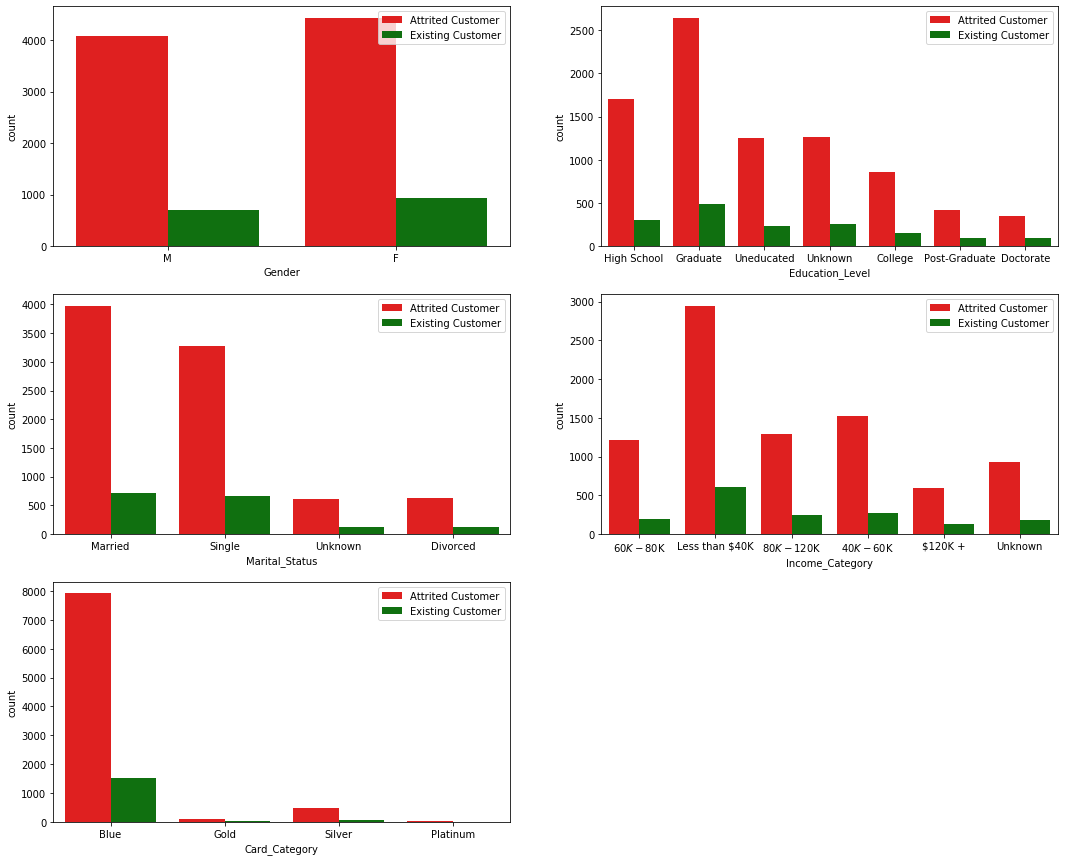

In [45]:
fig = plt.figure(figsize=(18,15))
i = 1
for variable in var_categoricas:
    ax = fig.add_subplot(math.ceil(len(var_categoricas)/2), 2, i)
    sns.countplot(x=variable, hue="Attrition_Flag", data=df, palette={'Attrited Customer': 'g', 'Existing Customer': 'r'})
    plt.legend(['Attrited Customer', 'Existing Customer'])
    i += 1

### Variables numéricas

Podemos visualizar scatterplots o gráficos de densidad, pero los primeros tienden a solaparse, lo que no permite observar bien la distribución de las observaciones. Por lo tanto, utilizar

### Creamos las variables Dummies